<a href="https://colab.research.google.com/github/amura/capmpricing/blob/main/Capital_Asset_Pricing_Model_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Accessing daily prices 

In [1]:
%%capture
!pip install pandas-datareader
!pip3 install yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [3]:
from pandas_datareader import data
import pandas as pd

In [4]:

# Apple, Intel, Microsoft, IBM, and S&P-500 for the period of 01/01/2021-04/01/2021
startDt = '2021-01-01'
endDt = '2021-04-01'
def getHistoricalPrices(shares):
  # panel_data = data.DataReader(shares, 'yahoo', startDt, endDt)
  # return panel_data
  import yfinance as yf  
  start = datetime.datetime(2020,1,1)
  end = datetime.datetime(2021,4,1)
  SP = yf.download(shares,start=startDt,end = endDt, interval='1d')
  return SP



In [27]:
shares = ['AAPL','INTC','MSFT','IBM','^GSPC']
historical_data = getHistoricalPrices(shares)
print(historical_data)

print(historical_data.shape)



[*********************100%***********************]  5 of 5 completed
             Adj Close                         ...    Volume                      
                  AAPL         IBM       INTC  ...      INTC      MSFT       ^GSPC
Date                                           ...                                
2021-01-04  128.997803  120.954201  49.068108  ...  46102500  37130100  5006680000
2021-01-05  130.592697  123.101204  49.996723  ...  24866600  23823000  4582620000
2021-01-06  126.196747  126.175316  50.480778  ...  36809600  35930700  6049970000
2021-01-07  130.502991  125.882545  51.557571  ...  32092300  27694500  5080870000
2021-01-08  131.629379  125.433624  51.024120  ...  34625400  22956200  4764180000
...                ...         ...        ...  ...       ...       ...         ...
2021-03-25  120.385513  131.599625  61.640350  ...  35401400  34061900  4940800000
2021-03-26  121.004463  134.873047  64.472908  ...  34705800  25479900  5467850000
2021-03-29  121.18

### Accessing risk free rate

Extract risk-free rate using FRED (Federal Reserve Economic Data) API for the period of 01/01/2021-04/01/2021 via yahoo finance API.

In [6]:
%%capture
!pip3 install fredapi


In [7]:
from fredapi import Fred
fred = Fred(api_key='e646ec454433af4d2d7d3a8b77b5cad3')

riskFreeRate = fred.get_series('DGS3MO', observation_start='01/01/2021', observation_end='04/01/2021')
print(riskFreeRate)

2021-01-01     NaN
2021-01-04    0.09
2021-01-05    0.09
2021-01-06    0.09
2021-01-07    0.09
              ... 
2021-03-26    0.02
2021-03-29    0.03
2021-03-30    0.02
2021-03-31    0.03
2021-04-01    0.02
Length: 65, dtype: float64


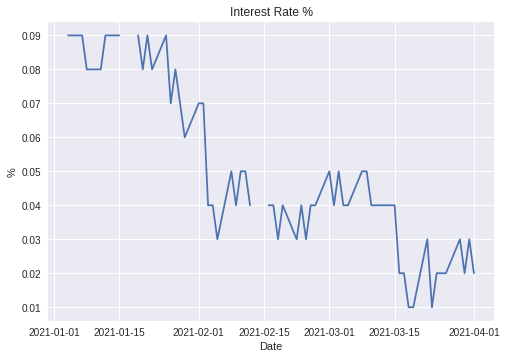

In [8]:
from matplotlib import  pyplot as plt
plt.plot(riskFreeRate)

plt.title('Interest Rate %')
plt.ylabel('%')
plt.xlabel('Date')
plt.show()

### Heatmap

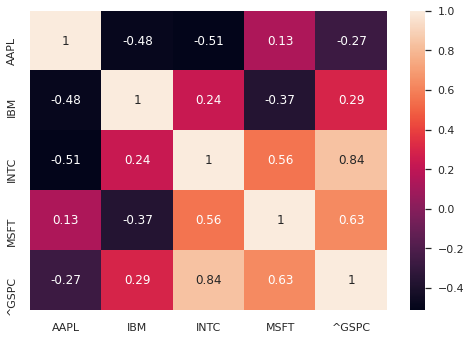

In [9]:
import seaborn as sns; sns.set_theme()

sns.heatmap(historical_data['Close'].corr(method='pearson'), annot=True)



### Daily returns


In [10]:
daily_return = historical_data['Close'].pct_change()
daily_return.dropna(inplace = True)
daily_return.head()


,AAPL,IBM,INTC,MSFT,^GSPC
Date,,,,,
2021-01-05,0.012364,0.017750,0.018925,0.000965,0.007083
2021-01-06,-0.033662,0.024972,0.009682,-0.025929,0.005710
2021-01-07,0.034123,-0.002320,0.021331,0.028457,0.014847
2021-01-08,0.008631,-0.003566,-0.010347,0.006093,0.005492
2021-01-11,-0.023249,0.000389,-0.002130,-0.009699,-0.006555


In [11]:
# daily_return = ((historical_data['Close']/ historical_data['Close'].shift(1)) - 1)
# daily_return.dropna(inplace = True)
# daily_return.head()

In [12]:
riskFreeRate.head()

2021-01-01     NaN
2021-01-04    0.09
2021-01-05    0.09
2021-01-06    0.09
2021-01-07    0.09
dtype: float64

In [13]:
# convert 3 month to daily rate
rfr = riskFreeRate / 90;


In [14]:
rfr.dropna(inplace = True)
rfr.head()

2021-01-04    0.001000
2021-01-05    0.001000
2021-01-06    0.001000
2021-01-07    0.001000
2021-01-08    0.000889
dtype: float64

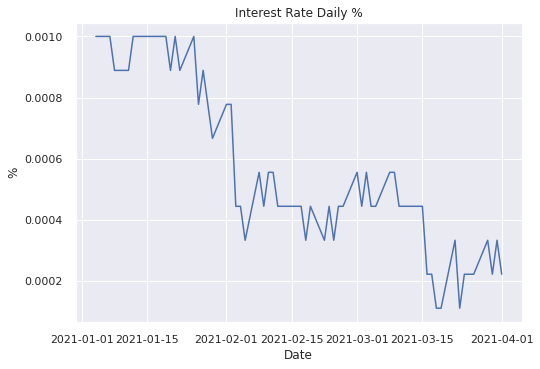

In [15]:
plt.plot(rfr)

plt.title('Interest Rate Daily %')
plt.ylabel('%')
plt.xlabel('Date')
plt.show()

### Excess stock and market returns

In [28]:
# go through each stock and calculate the excess return
for share in shares:
  historical_data[share + '_ER'] = daily_return[share] - rfr
historical_data.dropna(inplace=True)
print(historical_data.head())

             Adj Close                         ...   MSFT_ER    IBM_ER  ^GSPC_ER
                  AAPL         IBM       INTC  ...                              
Date                                           ...                              
2021-01-05  130.592697  123.101204  49.996723  ... -0.000035  0.016750  0.006083
2021-01-06  126.196747  126.175316  50.480778  ... -0.026929  0.023972  0.004710
2021-01-07  130.502991  125.882545  51.557571  ...  0.027457 -0.003320  0.013847
2021-01-08  131.629379  125.433624  51.024120  ...  0.005204 -0.004455  0.004603
2021-01-11  128.569168  125.482422  50.915451  ... -0.010587 -0.000500 -0.007444

[5 rows x 35 columns]
